# EDA Notebook

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif

In [2]:
# read in data
df = pd.read_csv('../data/processed/undersampled_data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65970 entries, 0 to 65969
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        65970 non-null  int64  
 1   income                            65970 non-null  float64
 2   name_email_similarity             65970 non-null  float64
 3   prev_address_months_count         65970 non-null  int64  
 4   current_address_months_count      65970 non-null  int64  
 5   customer_age                      65970 non-null  int64  
 6   days_since_request                65970 non-null  float64
 7   intended_balcon_amount            65970 non-null  float64
 8   payment_type                      65970 non-null  object 
 9   zip_count_4w                      65970 non-null  int64  
 10  velocity_6h                       65970 non-null  float64
 11  velocity_24h                      65970 non-null  float64
 12  velo

In [4]:
print(df.describe(include='all'))

          fraud_bool        income  name_email_similarity  \
count   65970.000000  65970.000000           65970.000000   
unique           NaN           NaN                    NaN   
top              NaN           NaN                    NaN   
freq             NaN           NaN                    NaN   
mean        0.166667      0.582239               0.478734   
std         0.372681      0.289798               0.292422   
min         0.000000      0.100000               0.000032   
25%         0.000000      0.300000               0.203774   
50%         0.000000      0.700000               0.473002   
75%         0.000000      0.900000               0.745608   
max         1.000000      0.900000               0.999992   

        prev_address_months_count  current_address_months_count  customer_age  \
count                65970.000000                  65970.000000  65970.000000   
unique                        NaN                           NaN           NaN   
top                     

## General EDA (Plots)

### General Distribution (Numerical Variables)

Through the histograms below, we are able to observe the general distribution of the features with numerical values. This is important as it ensures that we do not make any inaccurate assumptions on the dataset (ie. assuming a certain variable follows a certain distribution like Normal Distribution or Heavy tail Distributions)

In [5]:
non_categorical_df = df.select_dtypes(exclude=['object'])
categorical_df = df.select_dtypes(include=['object'])

non_categorical_label_df = non_categorical_df
non_categorical_label_df['fraud_bool'] = df['fraud_bool']

non_categorical_fraud = non_categorical_label_df[non_categorical_label_df['fraud_bool'] == 1]
non_categorical_real = non_categorical_label_df[non_categorical_label_df['fraud_bool'] == 0]

categorical_label_df = categorical_df
categorical_label_df['fraud_bool'] = df['fraud_bool']

categorical_fraud = categorical_label_df[categorical_label_df['fraud_bool'] == 1]
categorical_real = categorical_label_df[categorical_label_df['fraud_bool'] == 0]

/var/folders/2r/b755nr0n3mj2_km2l8qcr7lw0000gn/T/ipykernel_99565/936359266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_categorical_label_df['fraud_bool'] = df['fraud_bool']
/var/folders/2r/b755nr0n3mj2_km2l8qcr7lw0000gn/T/ipykernel_99565/936359266.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_label_df['fraud_bool'] = df['fraud_bool']


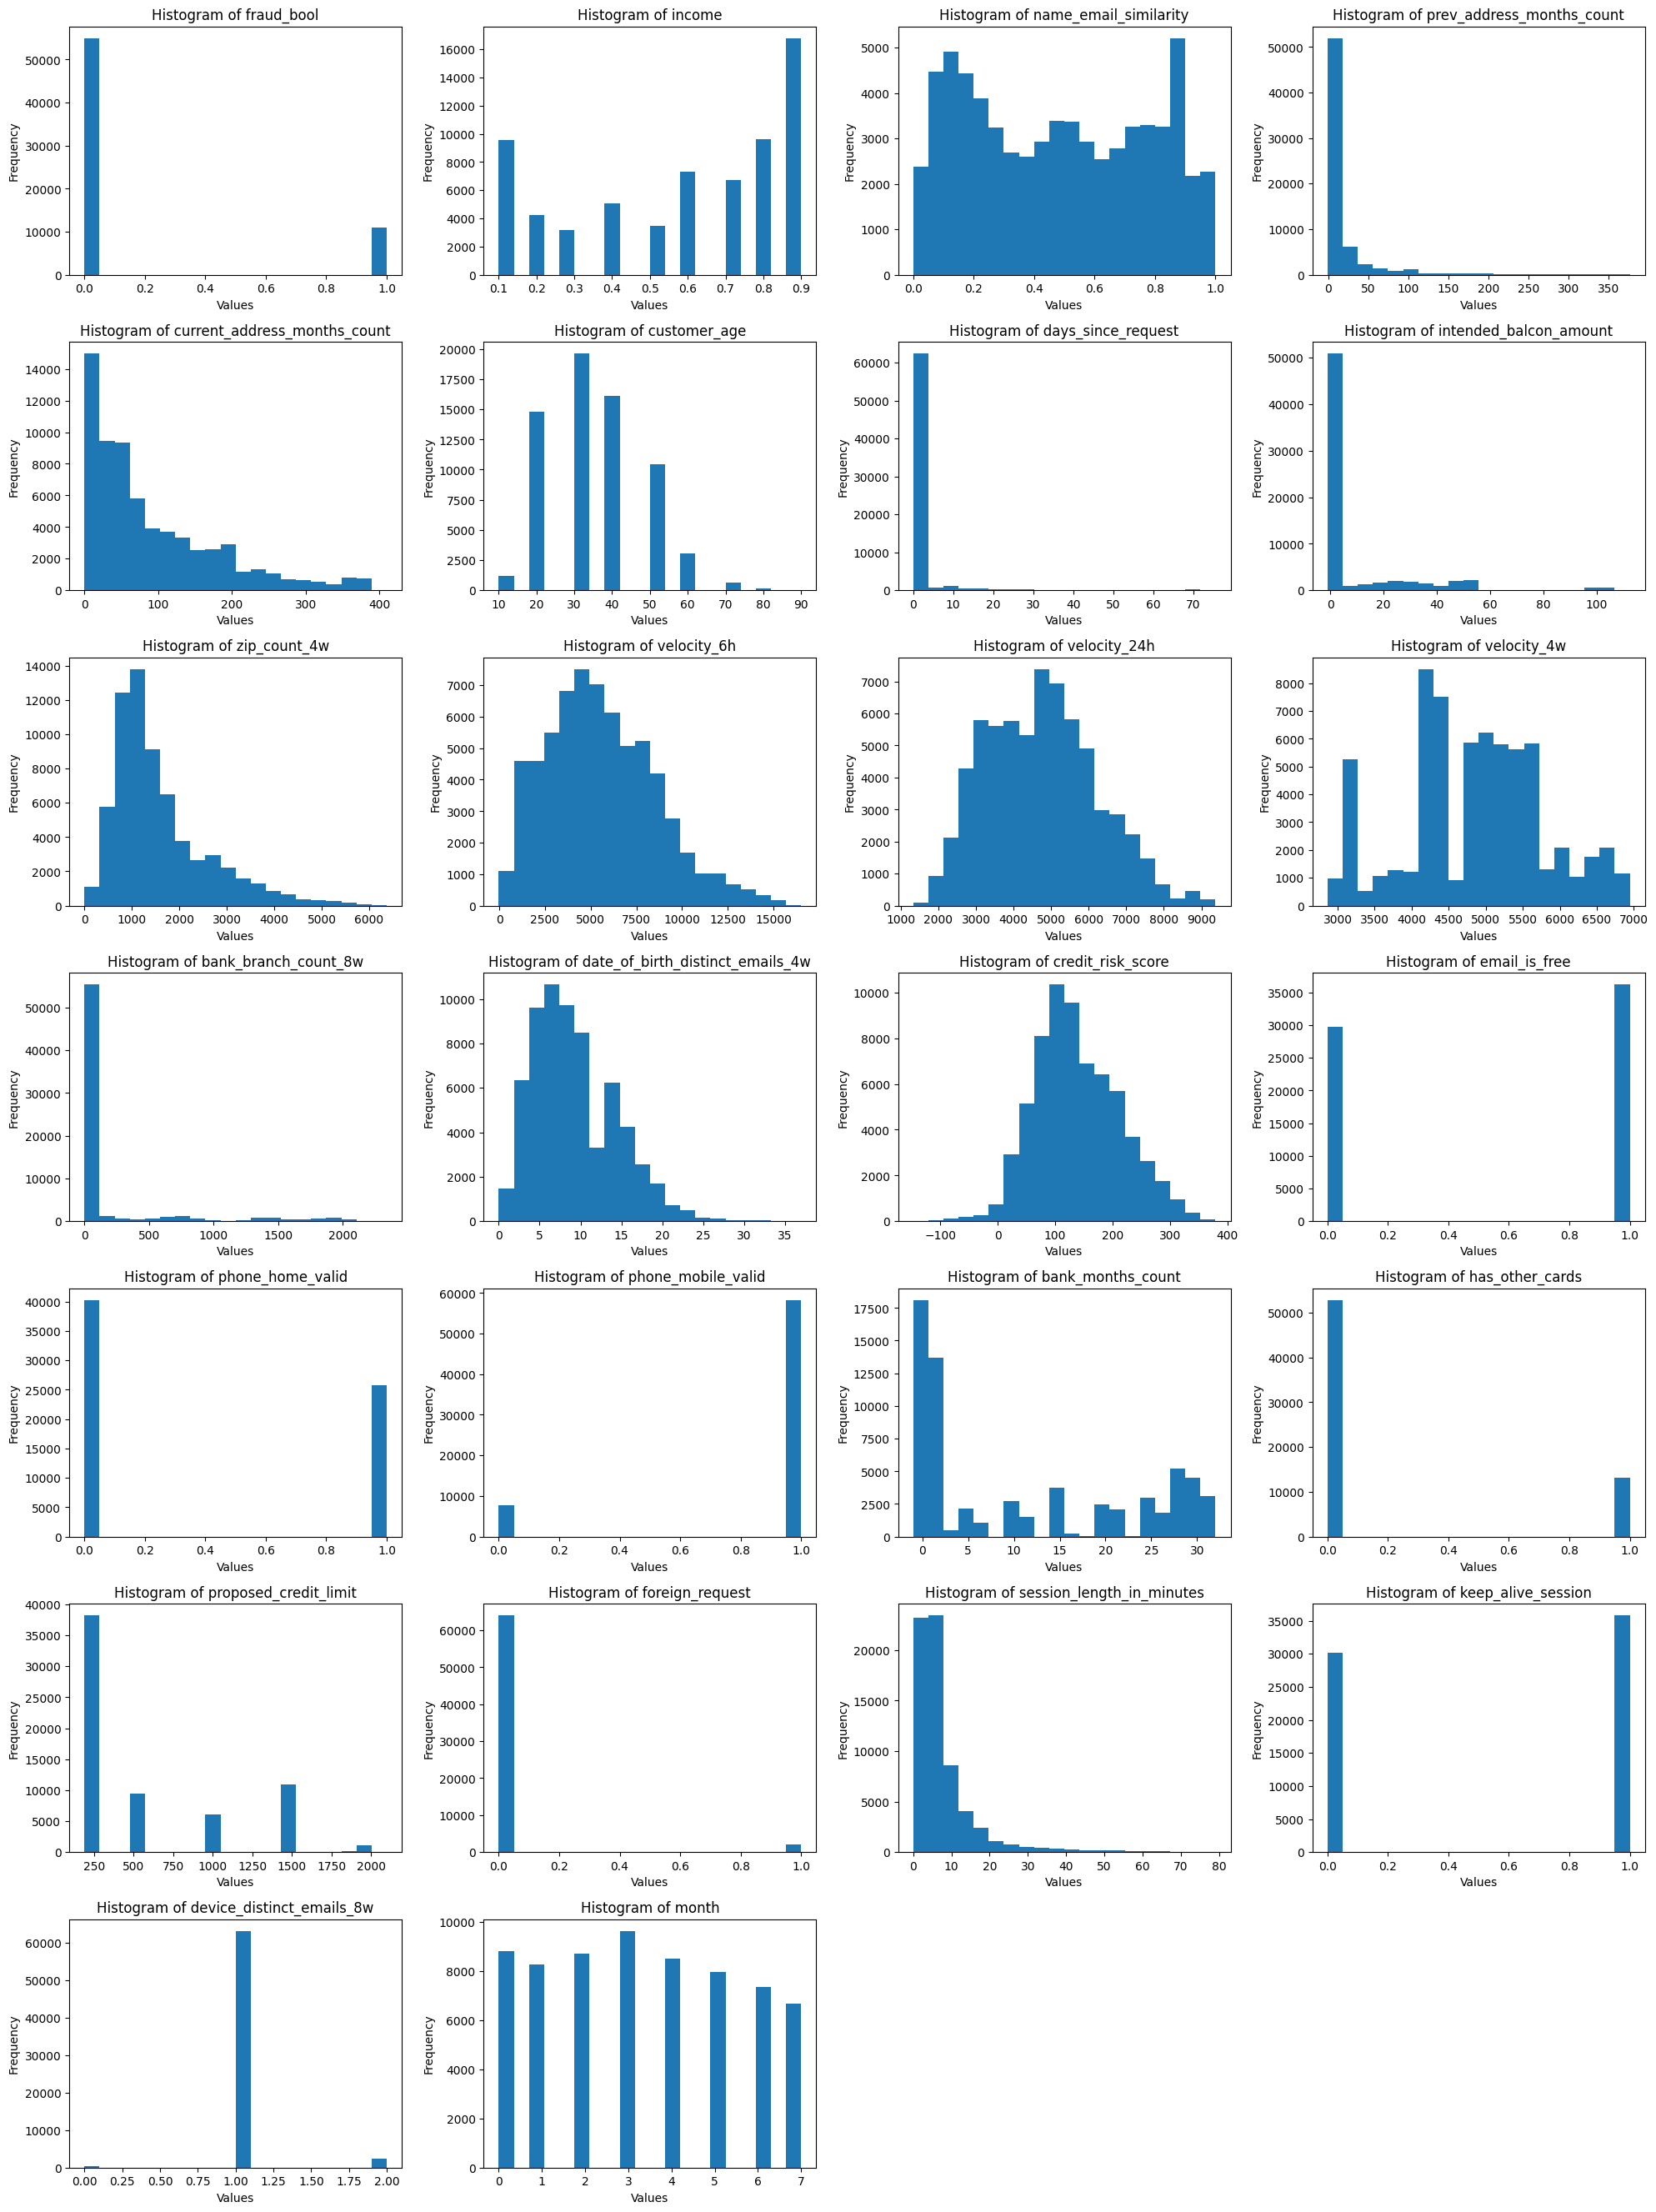

In [6]:
num_cols = len(non_categorical_df.columns)
num_rows = 8  # Number of rows in the grid
num_cols_per_row = 4  # Number of columns per row

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 30))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each column and plot its histogram on a separate subplot
for i, column_name in enumerate(non_categorical_df.columns):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    non_categorical_df[column_name].plot(kind='hist', ax=axes[i], bins=20)
    axes[i].set_title('Histogram of {}'.format(column_name))
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(num_cols, num_rows * num_cols_per_row):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()

### Label-wise Distribution (Numerical & Categorical Variables)

Through the histograms below, we are able to observe an additional layer of information with the histograms being colour-coded based on whether it is fraudulent or non-fraudulent. This provides us with a deeper overview on the distribution of not just the total dataset but also insights on specific distributions of the fraudulent and non-fraudulent dataset for each variable.

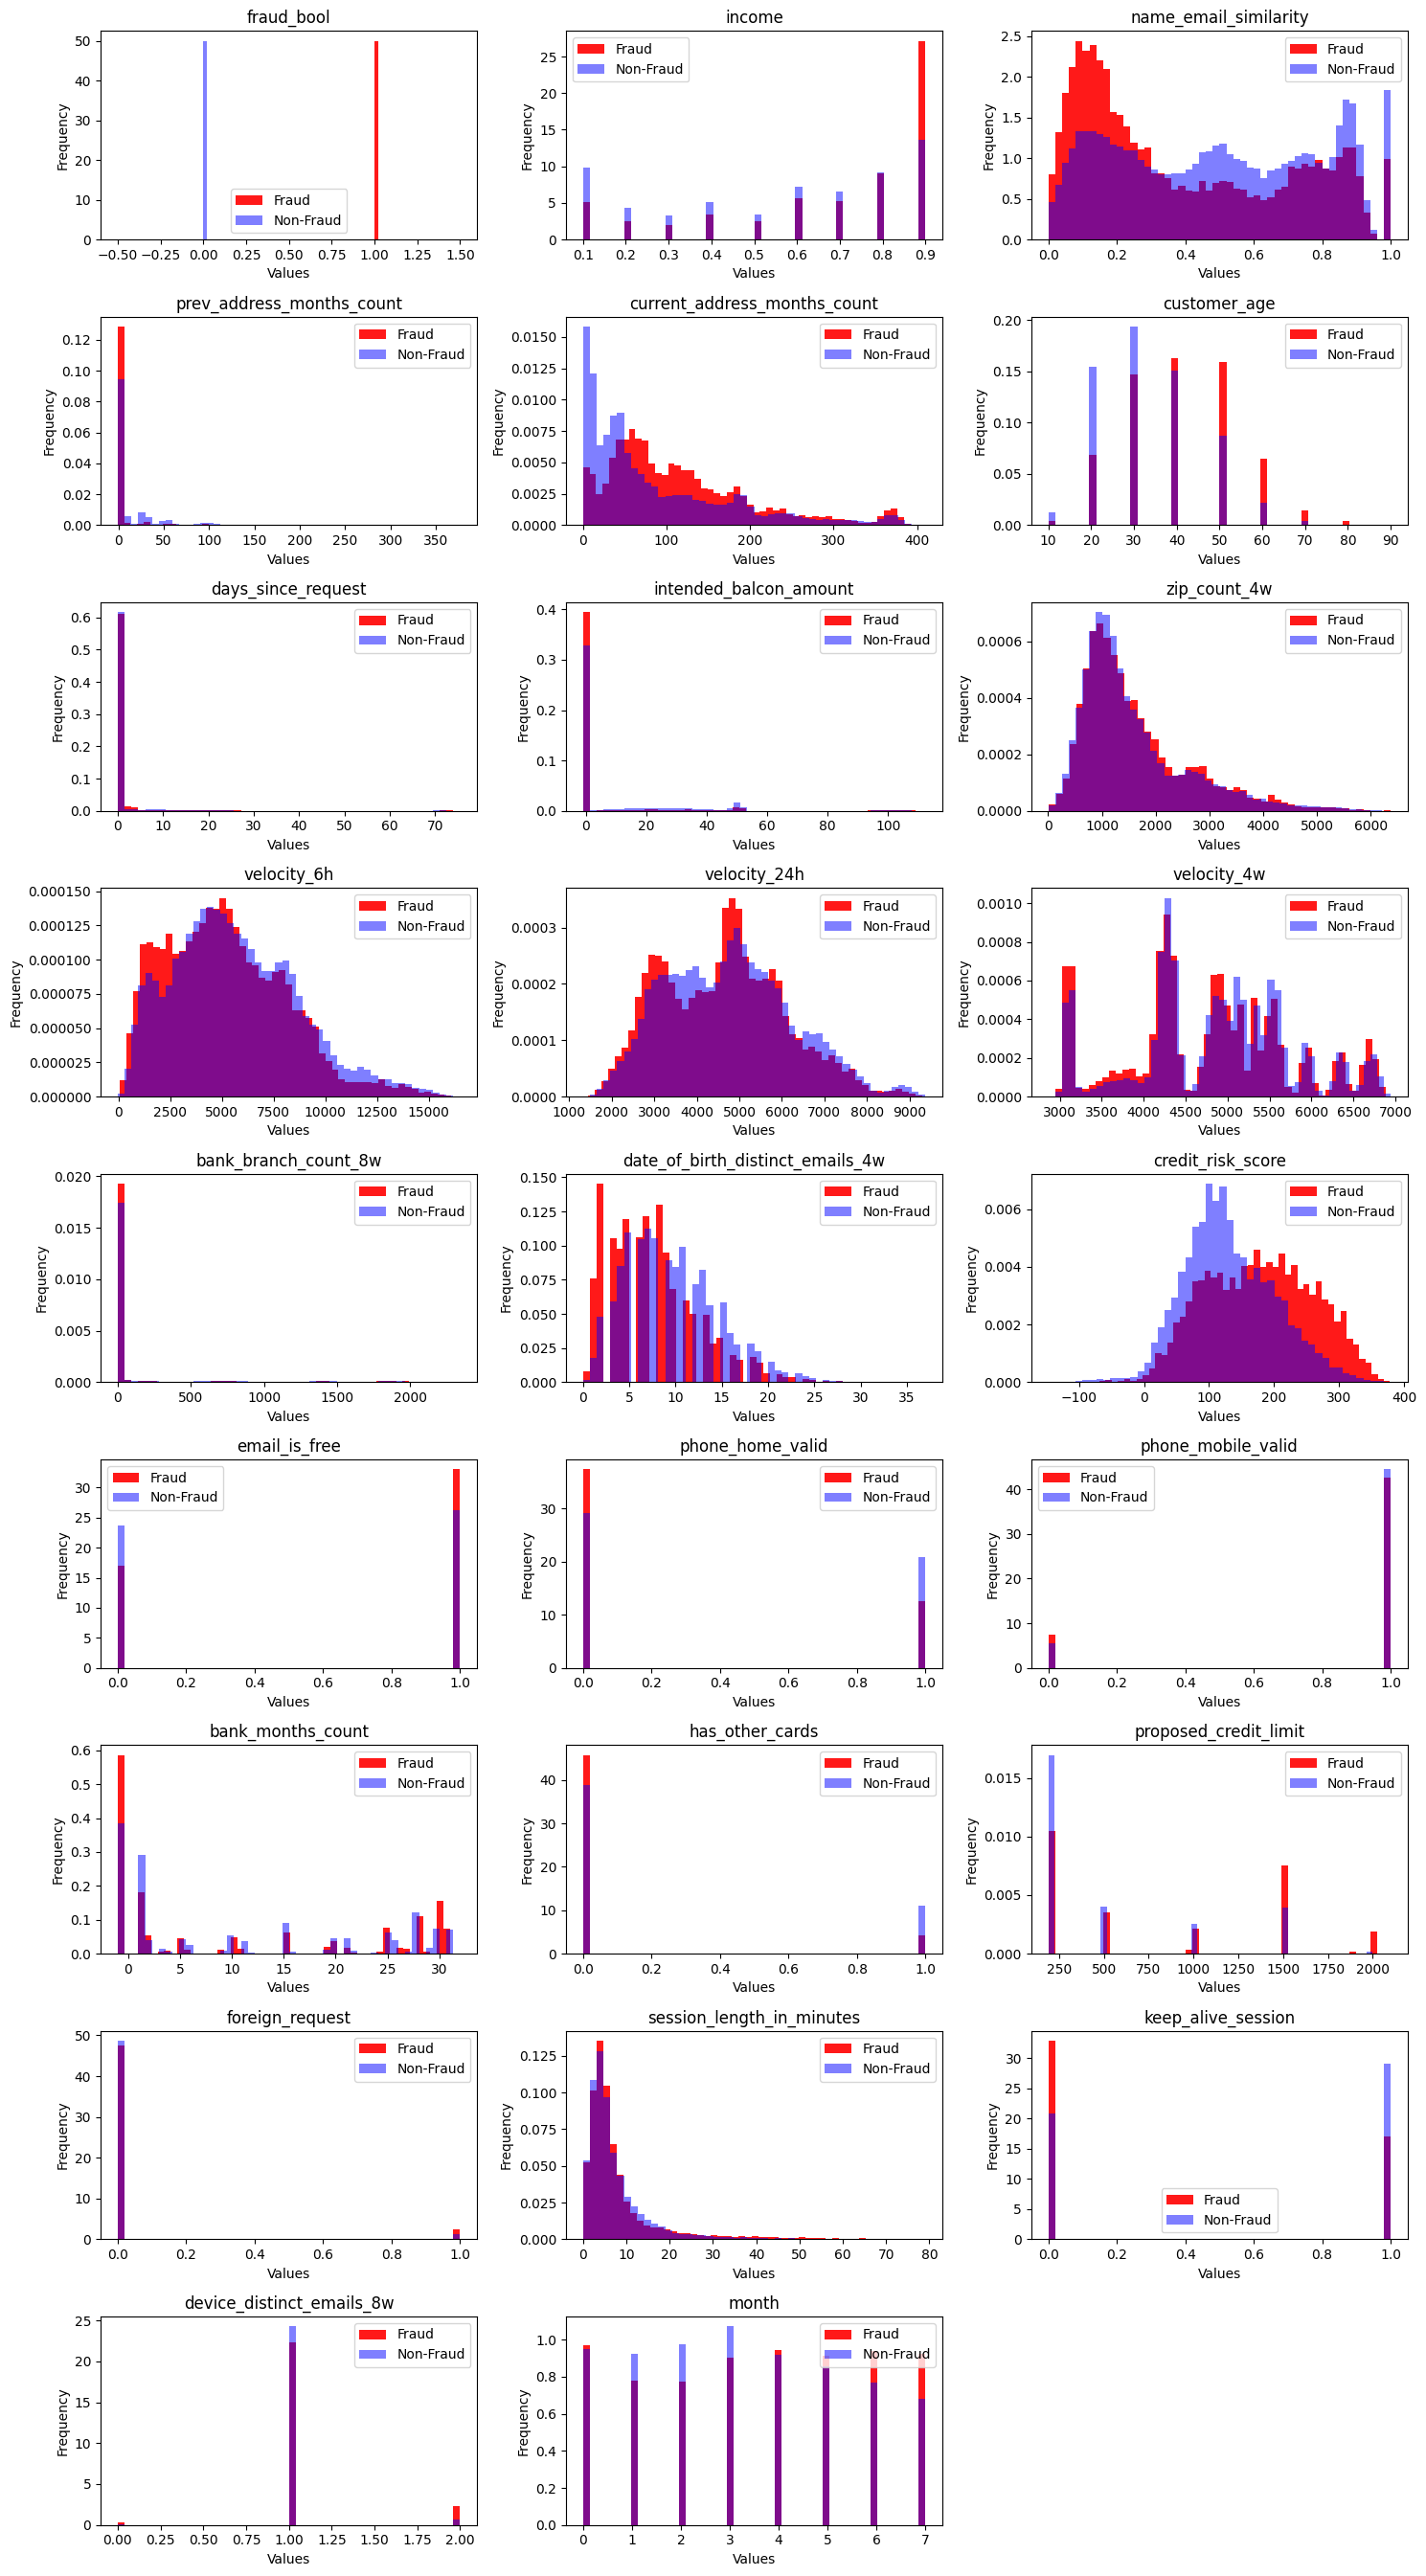

In [7]:
num_columns = len(non_categorical_fraud.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 3*num_rows))

for i, column in enumerate(non_categorical_fraud.columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    
    # Plot histogram for fraud data
    ax.hist(non_categorical_fraud[column], bins=50, alpha=0.9, label='Fraud', color='red', density=True)
    
    # Plot histogram for non-fraud data
    ax.hist(non_categorical_real[column], bins=50, alpha=0.5, label='Non-Fraud', color='blue', density=True)
    
    # Set title and labels
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Add legend
    ax.legend()

# Remove any unused subplots
for i in range(num_columns, num_rows*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

From these plots, we can identify certain trends of the fraudulent bank accounts:
- `income` of fraudulent bank accounts are usually higher than non-fraudulent bank accounts
- `name_email_similarity` of fraudulent bank accounts are usually lower than non-fraudulent bank accounts
- `customer_age` of fraudulent bank accounts are usually higher than non-fraudulent bank accounts
- `date_of_birth_distinct_emails_4w` of fraudulent bank accounts are usually lower than non-fraudulent bank accounts
- `credit_risk_score` of fraudulent bank accounts are usually higher than non-fraudulent bank accounts
- `email_is_free` of fraudulent bank accounts are usually higher than non-fraudulent bank accounts
- `phone_home_valid` of fraudulent bank accounts are usually lower than non-fraudulent bank accounts
- `proposed_credit_limit` of fraudulent bank accounts are usually higher than non-fraudulent bank accounts
- `keep_alive_session` of fraudulent bank accounts are usually lower than non-fraudulent bank accounts

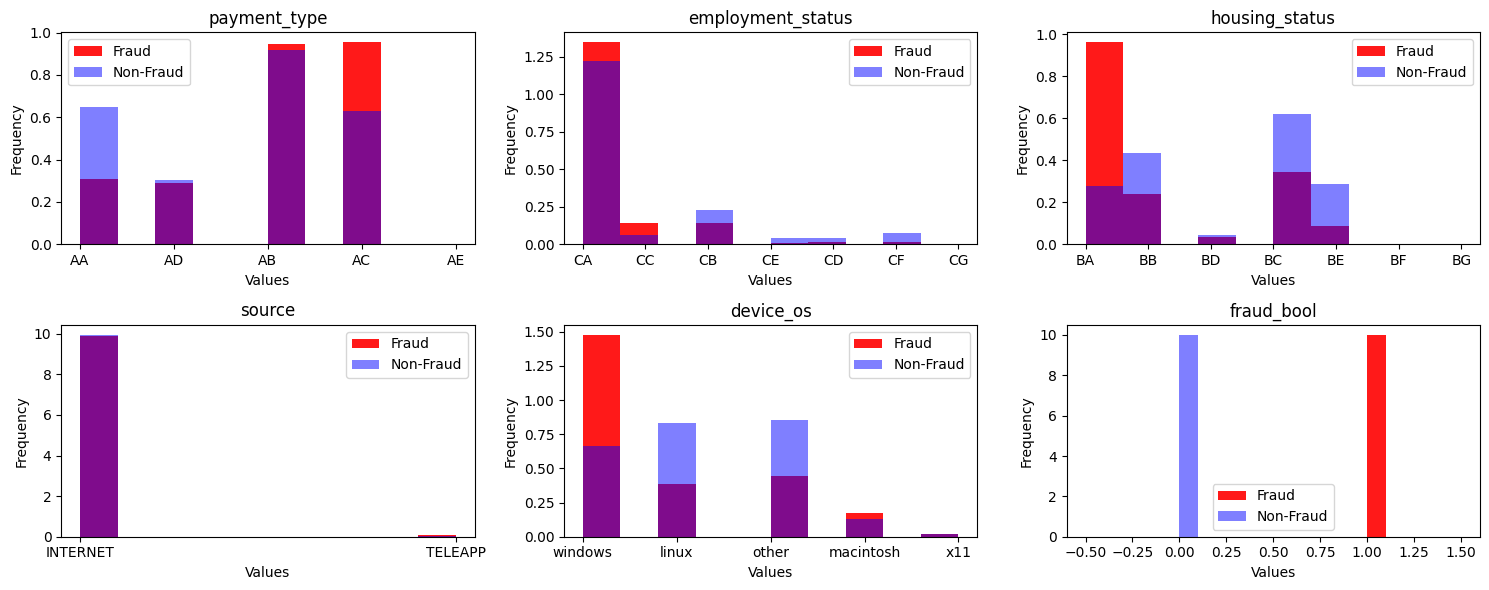

In [8]:
num_columns = len(categorical_fraud.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 3*num_rows))

for i, column in enumerate(categorical_fraud.columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    
    # Plot histogram for fraud data
    ax.hist(categorical_fraud[column], alpha=0.9, label='Fraud', color='red', density=True)
    
    # Plot histogram for non-fraud data
    ax.hist(categorical_real[column], alpha=0.5, label='Non-Fraud', color='blue', density=True)
    
    # Set title and labels
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    
    # Add legend
    ax.legend()

# Remove any unused subplots
for i in range(num_columns, num_rows*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

From these plots, we can identify certain trends of the fraudulent bank accounts:
- `payment_type` of fraudulent bank accounts are usually higher in types AB & AC and lower in types AA, AD & AE compared to non-fraudulent bank accounts
- `employment_status` of fraudulent bank accounts are usually higher in types CA & CC and lower in types CB, CE & CF compared to non-fraudulent bank accounts
- `housing_status` of fraudulent bank accounts are usually higher in types BA and lower in types BB, BC & BE compared to non-fraudulent bank accounts
- `device_os` of fraudulent bank accounts are usually higher in types windows & macintosh and lower in types linux & others compared to non-fraudulent bank accounts

### Box Plots

While histograms which show us the distribution of the variables across the fraudulent and non-fraudulent bank accounts, box plots allow us to compare the spread of the variable instead. By observing the (lack of) overlapping regions of the box plots, we can make some assumptions about certain behaviour of variables/features for fraudulent and non-fraudulent bank accounts.

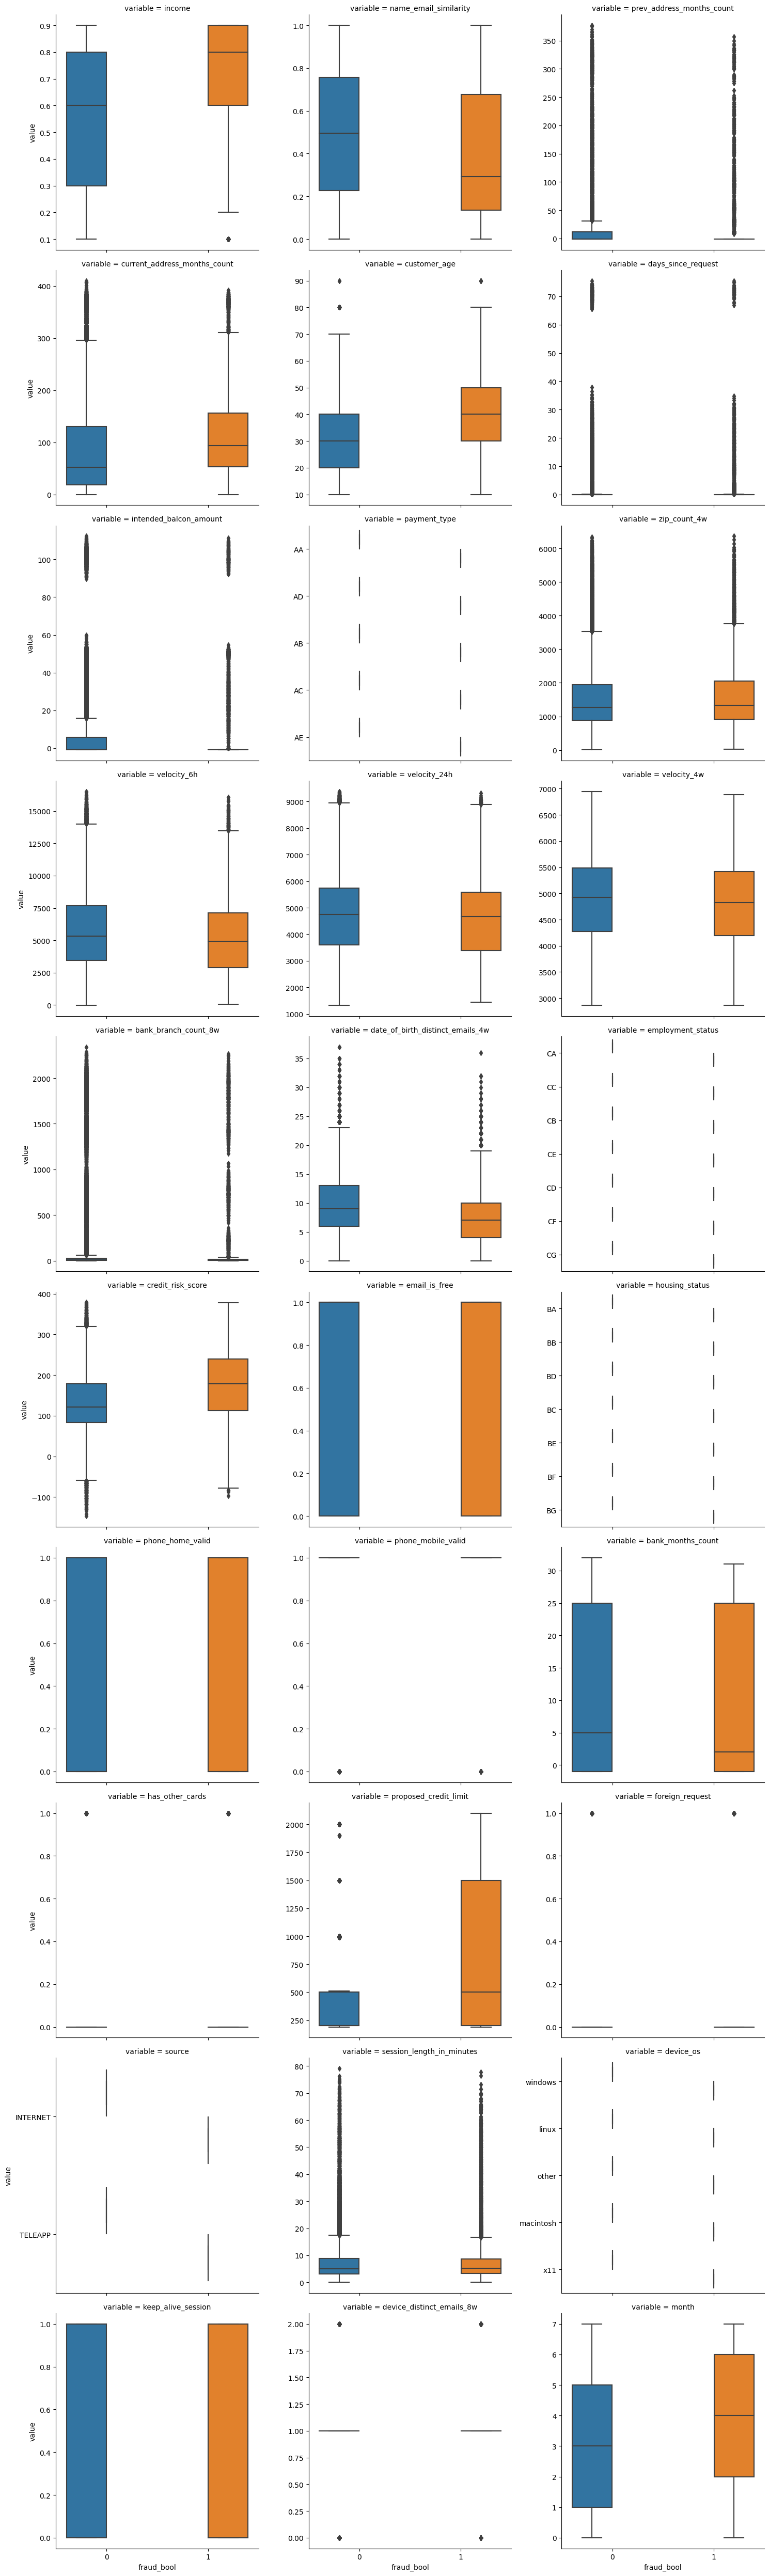

In [9]:
melt_df = df.melt(id_vars='fraud_bool')
# plot
sns.catplot(kind='box', data=melt_df, x='fraud_bool', y='value', col='variable', col_wrap=3,sharey=False, hue='fraud_bool')

From the boxplots, we are hoping to see a further separation based on the trends and patterns observed earlier on. While there is no clear separation between fraudulent and non-fraudulent for all the variables, hence there is no statistically significant difference between the fraudulent and non-fraudulent bank accounts. However, with the boxplot, we are able to better quantify the difference in trends between fraudulent and non-fraudulent bank accounts compared to the histogram.

In particular, for `income`, `proposed_credit_limit`, `credit_risk_score` and `age`, the median value of the fraudulent bank accounts exceed the upper quartile of the non-fraudulent bank accounts.

### Correlation Plots

Apart from looking into the distribution of the variables, correlation plots allow us to identify variables which may be highly correlated. Multicollinearity may result in an overfitted or unstable model. With more features, the correlated features may also mask interactions between true important features as well as lower the interpretability of the model. In terms of feature engineering, identifying the highly correlated features may also allow us to identify suspiciious bank accounts when the features are not performing as to the typical correlation.

<AxesSubplot:>

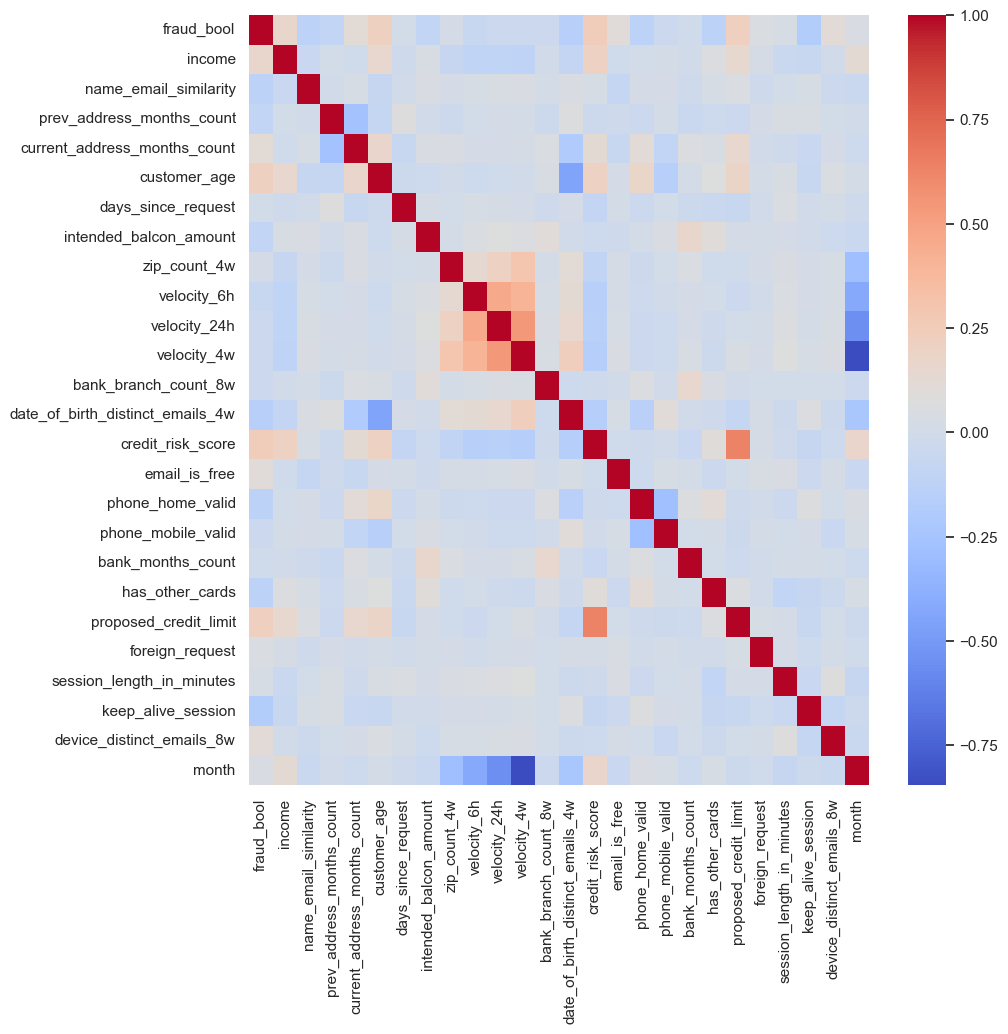

In [11]:
corr_mat = df.corr()
sns.set(rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".1f",xticklabels=True, yticklabels=True)

From the correlation plot, there are some areas of observed correlation between certain variables:
- positive correlation between `zip_count_4w`, `velocity_6h`, `velocity_24h` and `velocity_4w`.
- positive correlation between `income`, `customer_age`, `current_address_months_count`, `credit_risk_score`, `phone_home_valid` and `proposed_credit_limit` with stronger positive correlation between `credit_risk_score` and `proposed_credit_limit` in particular.
- negative correlation between `month` and  `zip_count_4w`, `velocity_6h`, `velocity_24h`, `velocity_4w`.

As the correlation plot requires the variables to be numerical, we can employ one-hot encoding on the cateogrical variables, so that we can further observe if a particular value of a categorical variable has any correlation with the other variables.

In [26]:
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df[categorical_df.columns[:-1]])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_df.columns[:-1]))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_df.columns[:-1], axis=1)

print(df_encoded.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.570800                         -1   
1           1     0.1               0.993219                         -1   
2           1     0.8               0.794351                         -1   
3           1     0.7               0.090000                         -1   
4           1     0.9               0.998248                         31   

   current_address_months_count  customer_age  days_since_request  \
0                           157            60            0.005908   
1                            67            20            0.015331   
2                           376            60           17.925951   
3                            58            50            0.004134   
4                            45            30            0.010165   

   intended_balcon_amount  zip_count_4w  velocity_6h  ...  housing_status_BE  \
0               35.337538          4079  8139.265753  

<AxesSubplot:>

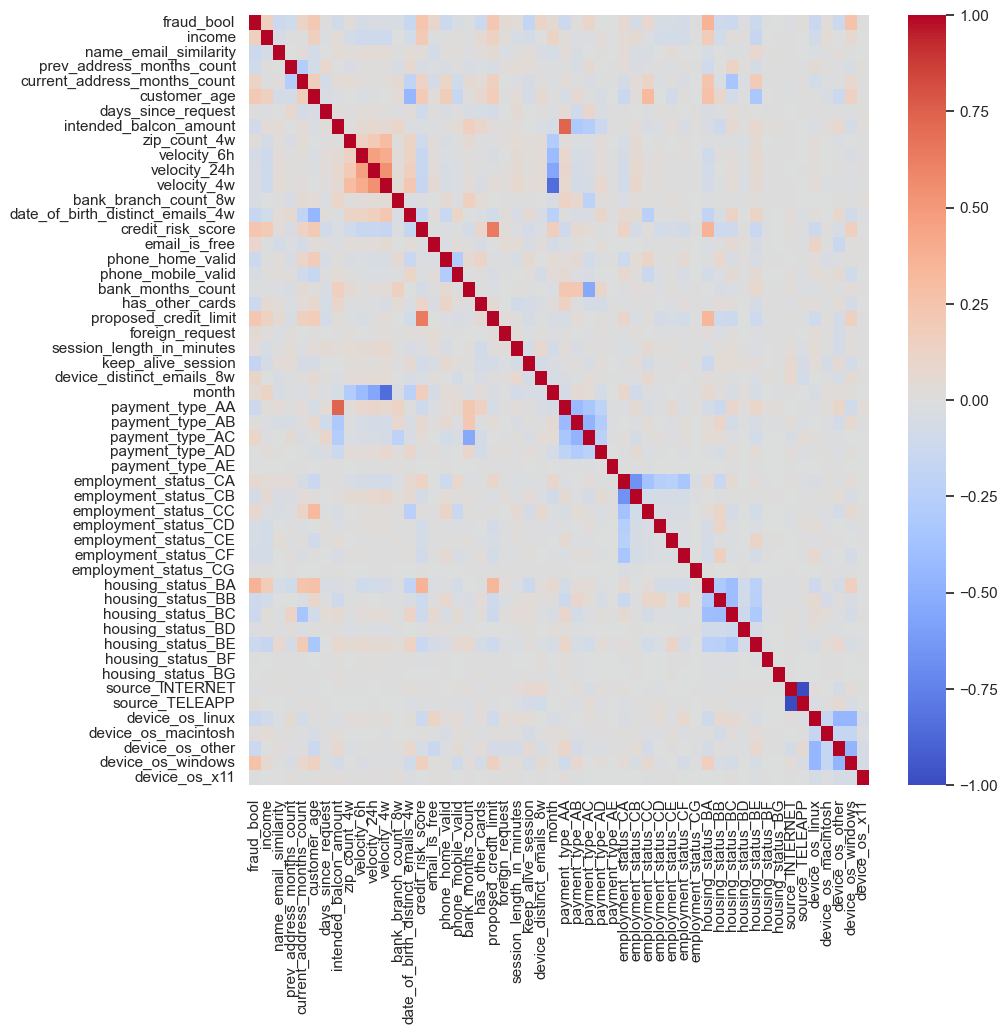

In [27]:
corr_mat = df_encoded.corr()
sns.set(rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".1f",xticklabels=True, yticklabels=True)

Comparing this new correlation plot, `payment_type_AA`, `housing_status_BA` and `employment_status_CC` also show greater correlation with the other variables compared to the other payment types, housing statuses and employment statuses. Hence, these are strong contenders to be considered when we test for hypothesis and carry out feature engineering in the subsequent steps.

While correlation is not causation, we can also observe the variables which are somewhat correlated to `fraud_bool` which can be useful in our subsequent hypothesis testing and feature engineering step. These variables are:
- `income`
- `customer_age`
- `credit_risk_score`
- `proposed_credit_limit`
- `housing_status_BA`
and variables with some signs of correlation are:
- `current_address_months_count`
- `email_is_free`
- `payment_type_AC`
- `employment_status_CA`
- `employment_status_CC`

## Feature Importance

In this section, we will be employing techniques to determine feature importance. These will be done with the following methods:
- Random Forest
- Gradient Boosting
- Lasso

In [28]:
df_label = df_encoded['fraud_bool']
df_encoded = df_encoded.drop(columns='fraud_bool')
print(df_label.head())
print(df_encoded.head())

0    1
1    1
2    1
3    1
4    1
Name: fraud_bool, dtype: int64
   income  name_email_similarity  prev_address_months_count  \
0     0.9               0.570800                         -1   
1     0.1               0.993219                         -1   
2     0.8               0.794351                         -1   
3     0.7               0.090000                         -1   
4     0.9               0.998248                         31   

   current_address_months_count  customer_age  days_since_request  \
0                           157            60            0.005908   
1                            67            20            0.015331   
2                           376            60           17.925951   
3                            58            50            0.004134   
4                            45            30            0.010165   

   intended_balcon_amount  zip_count_4w  velocity_6h  velocity_24h  ...  \
0               35.337538          4079  8139.265753   4312.23061

In [30]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(df_encoded, df_label)
rf_feature_importances = rf_model.feature_importances_


# Gradient Boosting model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(df_encoded, df_label)
gbm_feature_importances = gbm_model.feature_importances_



# Lasso regression model
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(df_encoded, df_label)
lasso_coefficients = lasso_model.coef_

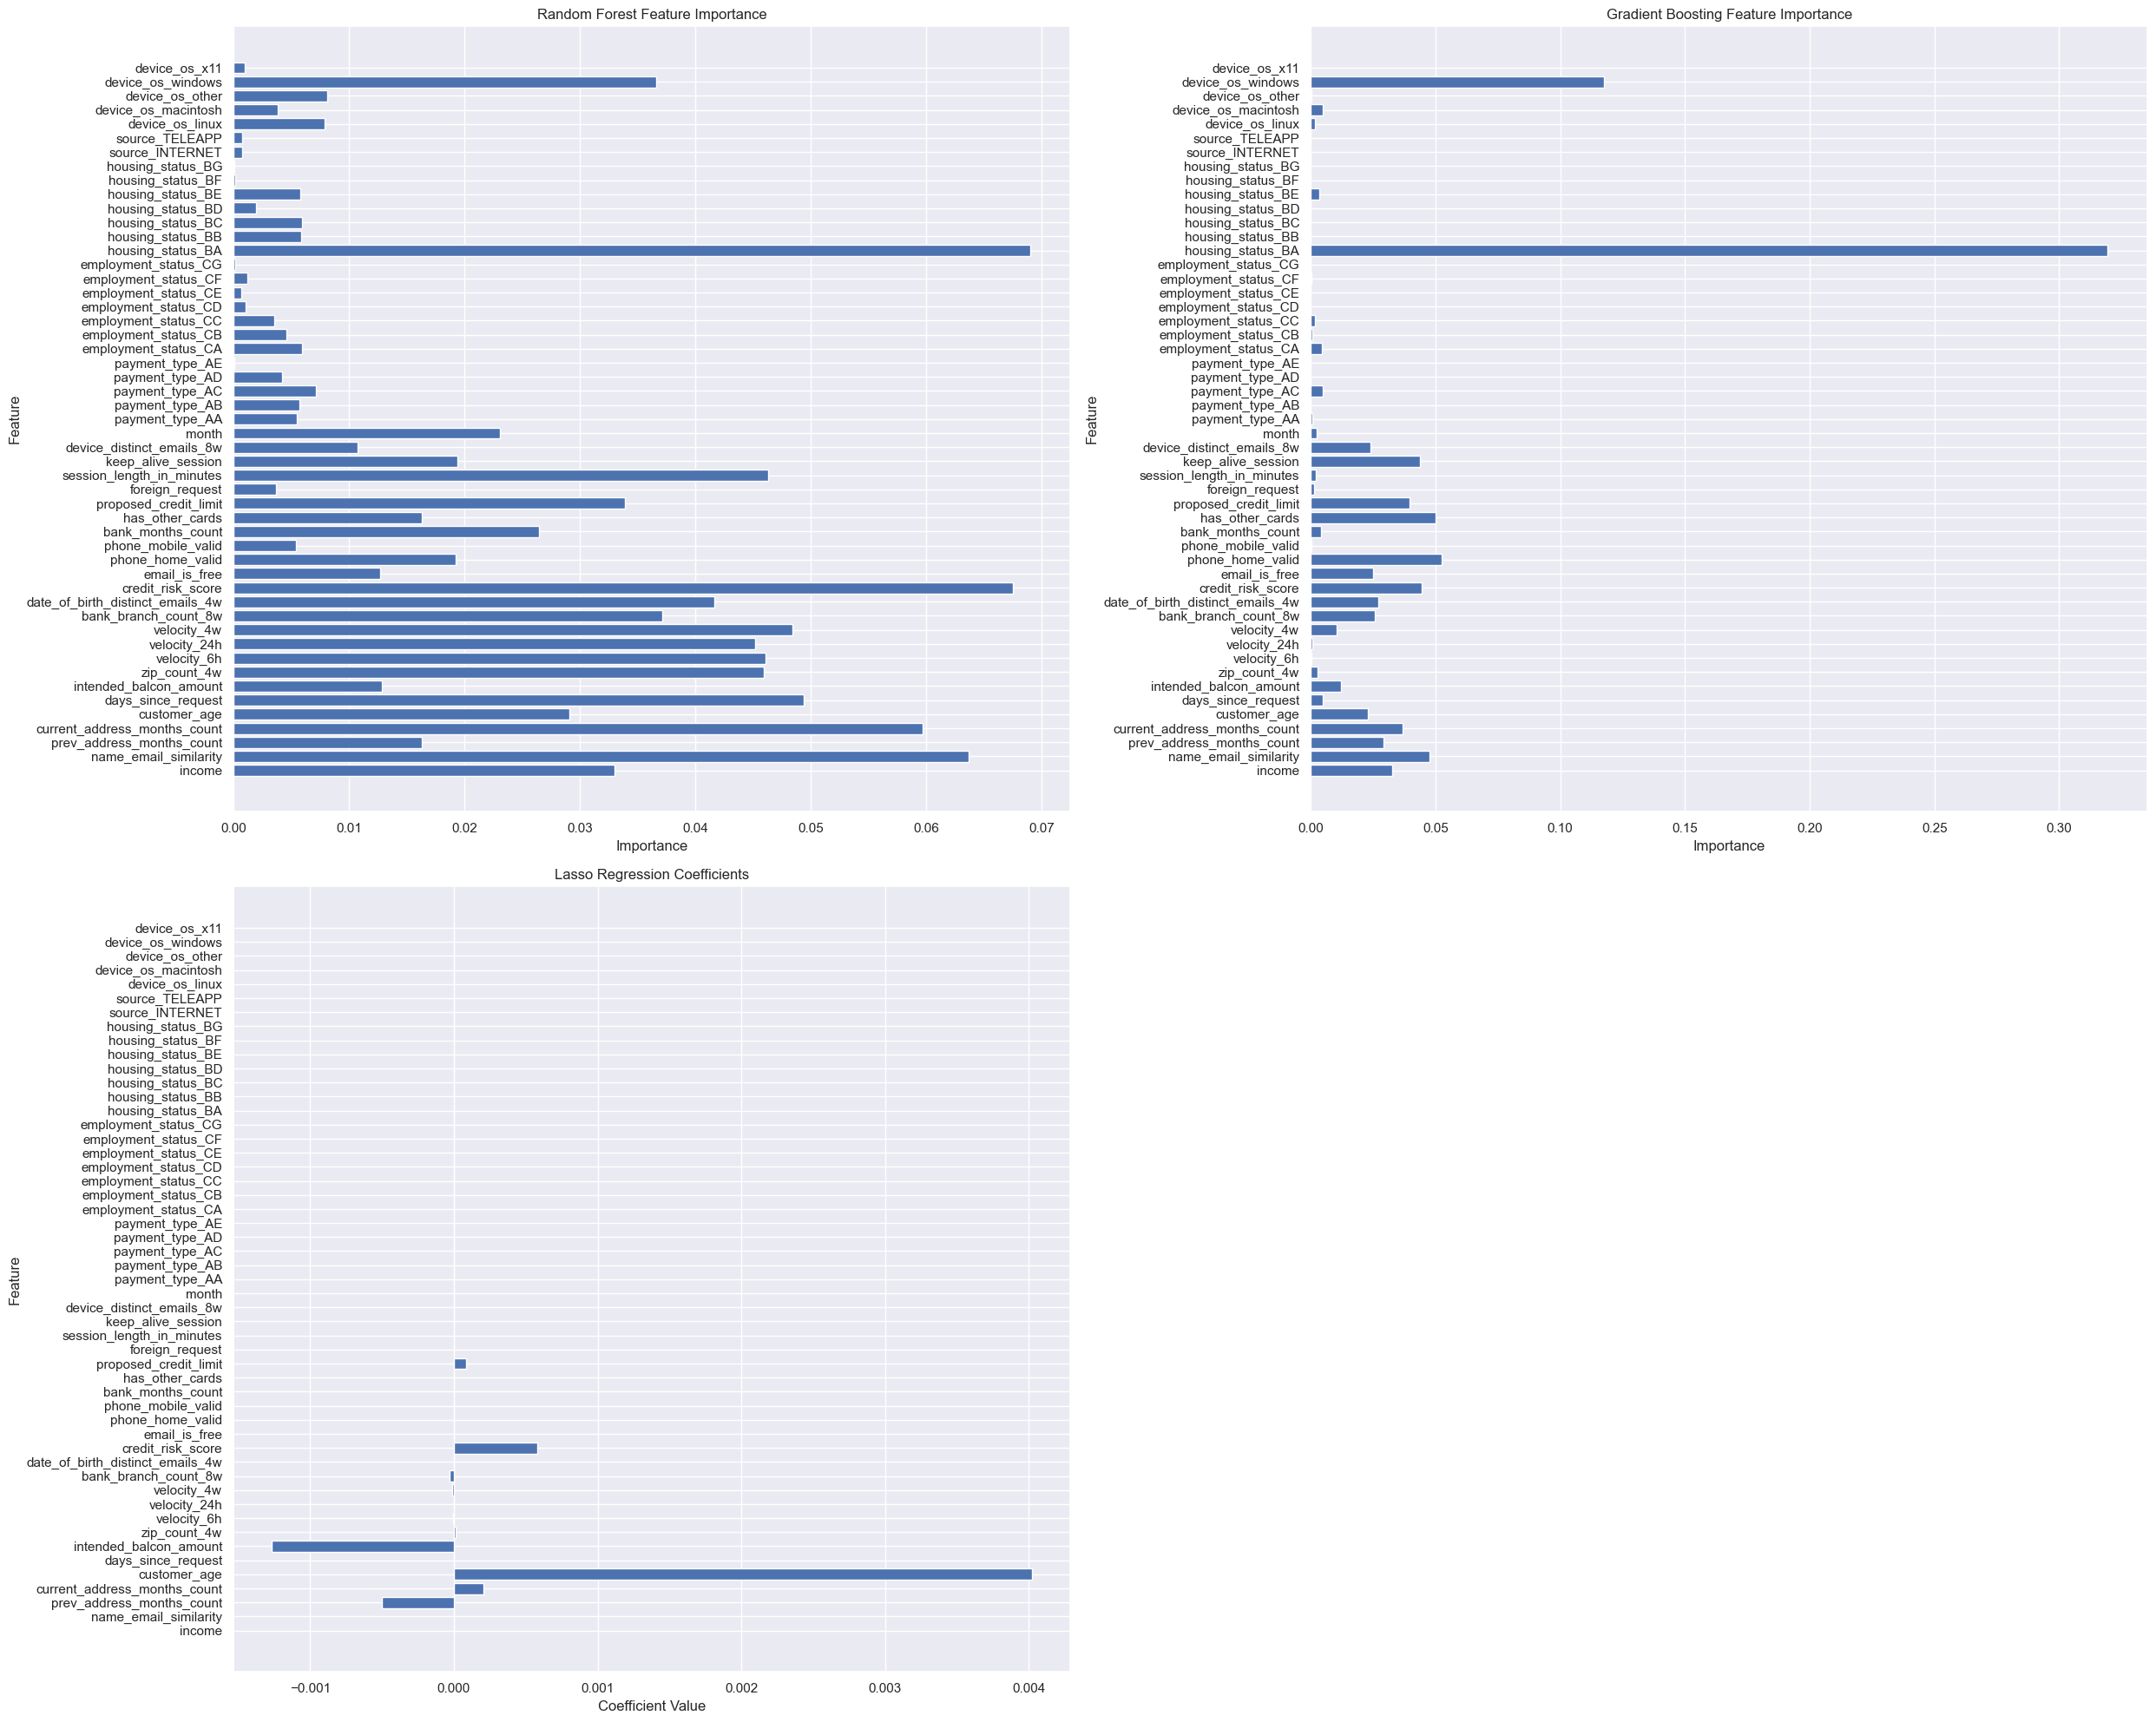

In [31]:
# Visualize feature importances
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
plt.barh(range(len(rf_feature_importances)), rf_feature_importances, tick_label=df_encoded.columns)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(2, 2, 2)
plt.barh(range(len(gbm_feature_importances)), gbm_feature_importances, tick_label=df_encoded.columns)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(2, 2, 3)
plt.barh(range(len(lasso_coefficients)), lasso_coefficients, tick_label=df_encoded.columns)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

From the plots, we can identify the important features based on a preliminary model testing.

For the Random Forest model, the top 5 important features are:
- `housing_status_BA`
- `credit_risk_score`
- `name_email_similarity`
- `current_address_months_count`
- `days_since_request`.

For the Gradient Boost model, the top 5 important features are:
- `housing_status_BA`
- `device_os_windows`
- `phone_home_valid`
- `has_other_cards`
- `name_email_similarity`.

For the Lasso Regression model, the top 5 important features are:
- `customer_age`
- `credit_risk_score`
- `intended_balcon_amount`
- `prev_address_months_count`
- `current_address_months_count`.

## Mutual Information

Mutual information, the measure of the mutual dependence between 2 variable can allow us to quantify the amount of information onbtained about one variable by observing the other variable.

housing_status_BA                   0.058411
device_os_windows                   0.031484
proposed_credit_limit               0.031096
credit_risk_score                   0.028139
current_address_months_count        0.025866
customer_age                        0.024978
prev_address_months_count           0.020402
income                              0.020009
date_of_birth_distinct_emails_4w    0.019864
keep_alive_session                  0.018861
device_distinct_emails_8w           0.017311
bank_months_count                   0.016953
device_os_linux                     0.013467
bank_branch_count_8w                0.013172
housing_status_BC                   0.012572
name_email_similarity               0.011139
phone_mobile_valid                  0.010598
has_other_cards                     0.010375
source_INTERNET                     0.010296
phone_home_valid                    0.010015
intended_balcon_amount              0.009510
employment_status_CA                0.009431
device_os_

<AxesSubplot:>

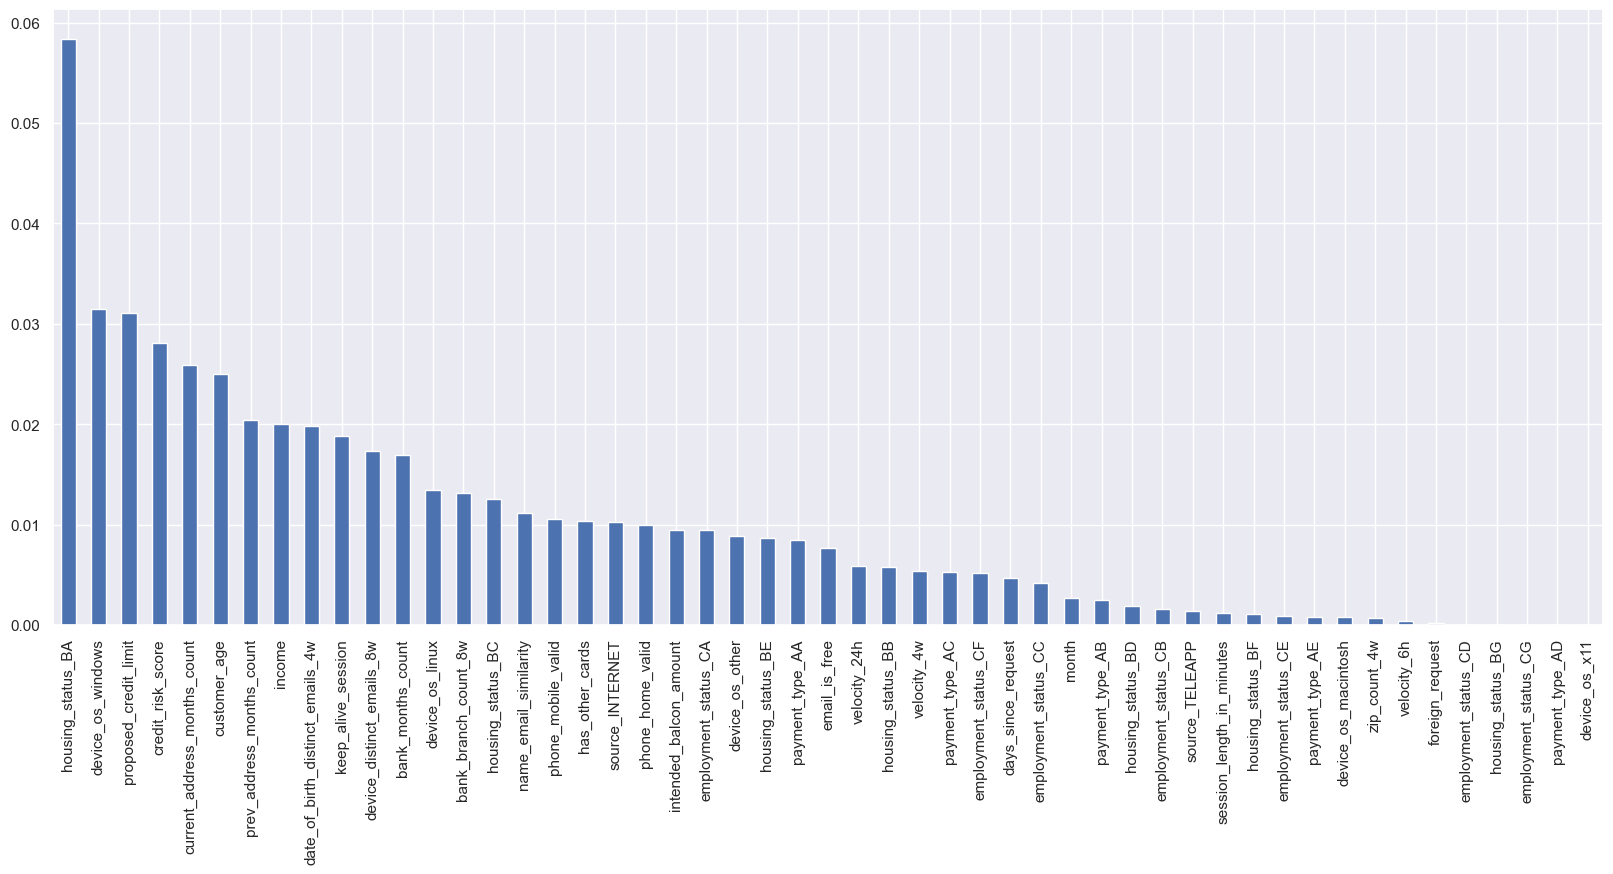

In [36]:
MIC = mutual_info_classif(df_encoded, df_label)
MIC = pd.Series(MIC)
MIC.index = df_encoded.columns
print(MIC.sort_values(ascending=False))
MIC.sort_values(ascending=False).plot.bar(figsize=(20, 8))

From the mutual information analysis, the top 5 variables with the highest mutual information with `fraud_bool` are:
- `credit_risk_score`
- `customer_age`
- `housing_status_BA`
- `proposed_credit_limit`
- `velocity_4w`